In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
# Load the dataset
df = pd.read_csv("loan_approval_dataset.csv")

In [3]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [4]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [6]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [7]:
df.shape

(4269, 13)

In [8]:
df.dtypes

loan_id                      int64
no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object

In [9]:
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [10]:
# Drop the loan_id column (not useful for prediction)
df.drop(columns=['loan_id'], inplace=True)

In [11]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [12]:
# Strip column names of leading/trailing spaces
df.columns = df.columns.str.strip()

In [13]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [14]:
# Encode categorical data for correlation heatmap
df_encoded = df.copy()
le = LabelEncoder()
df_encoded['education'] = le.fit_transform(df_encoded['education'])
df_encoded['self_employed'] = le.fit_transform(df_encoded['self_employed'])
df_encoded['loan_status'] = le.fit_transform(df_encoded['loan_status'])

In [15]:
df_encoded

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0


C:\Users\91733\AppData\Local\Temp\ipykernel_19180\4200090635.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='loan_status', palette='Set2')


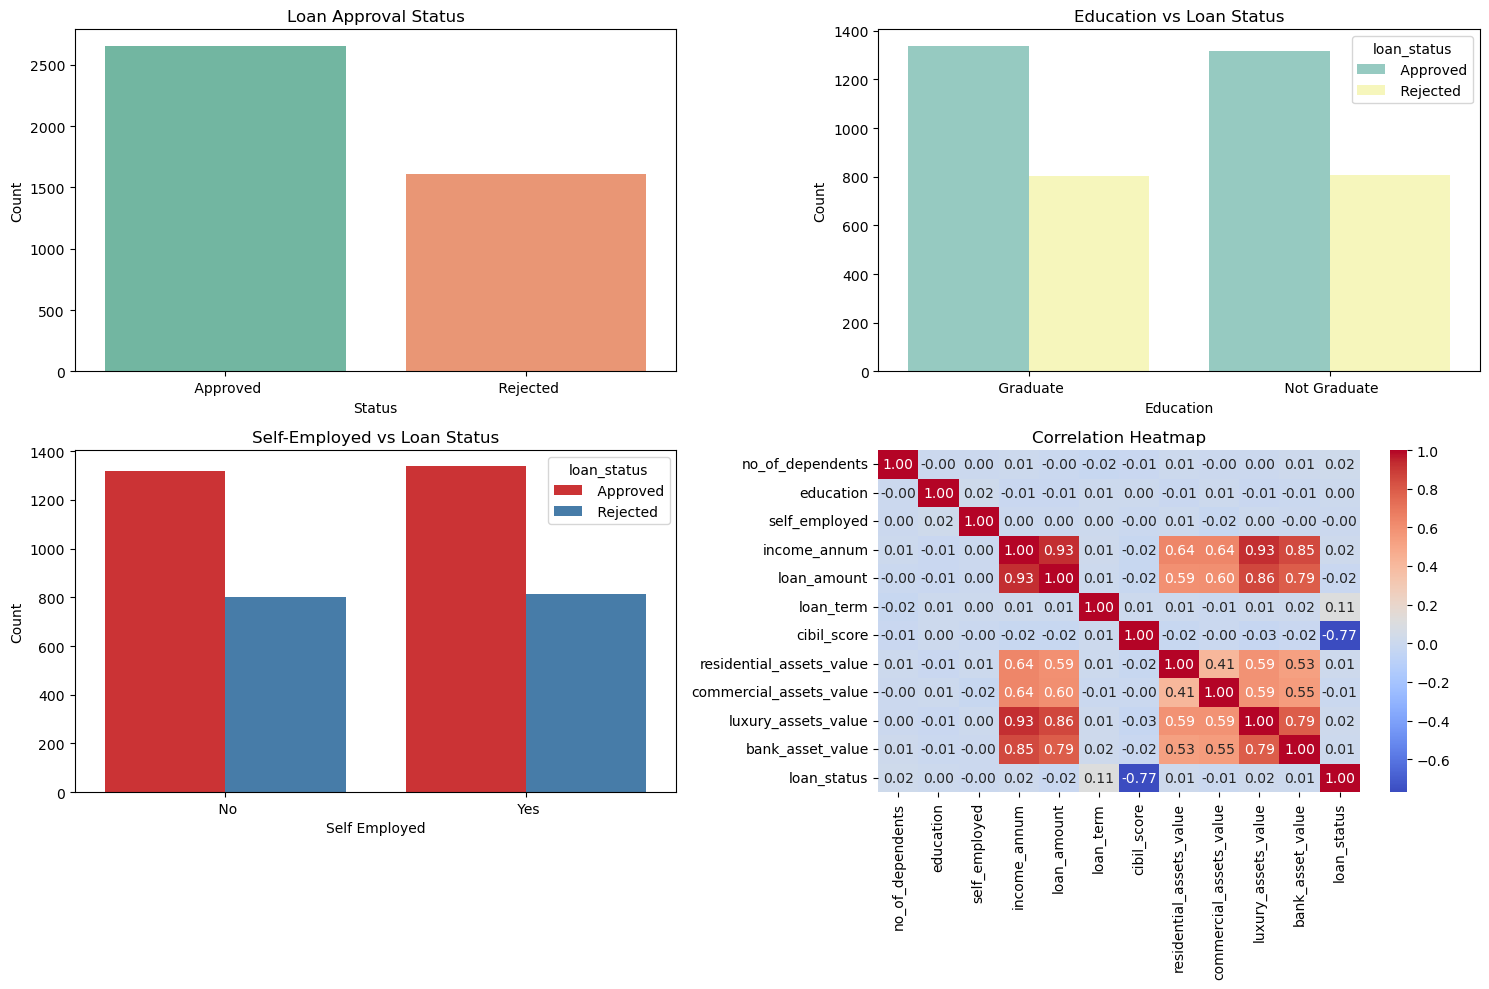

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
# Plotting
plt.figure(figsize=(15, 10))

# 1. Loan Status Distribution
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='loan_status', palette='Set2')
plt.title('Loan Approval Status')
plt.xlabel('Status')
plt.ylabel('Count')

# 2. Education vs Loan Status
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='education', hue='loan_status', palette='Set3')
plt.title('Education vs Loan Status')
plt.xlabel('Education')
plt.ylabel('Count')

# 3. Self-Employed vs Loan Status
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='self_employed', hue='loan_status', palette='Set1')
plt.title('Self-Employed vs Loan Status')
plt.xlabel('Self Employed')
plt.ylabel('Count')

# 4. Correlation Heatmap
plt.subplot(2, 2, 4)
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

C:\Users\91733\AppData\Local\Temp\ipykernel_19180\732987806.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y='cibil_score', palette='coolwarm')
C:\Users\91733\AppData\Local\Temp\ipykernel_19180\732987806.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='education', y='income_annum', palette='spring')
C:\Users\91733\AppData\Local\Temp\ipykernel_19180\732987806.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='self_employed', y='loan_amount', palette='autumn')
C:\Users\91733\AppData\

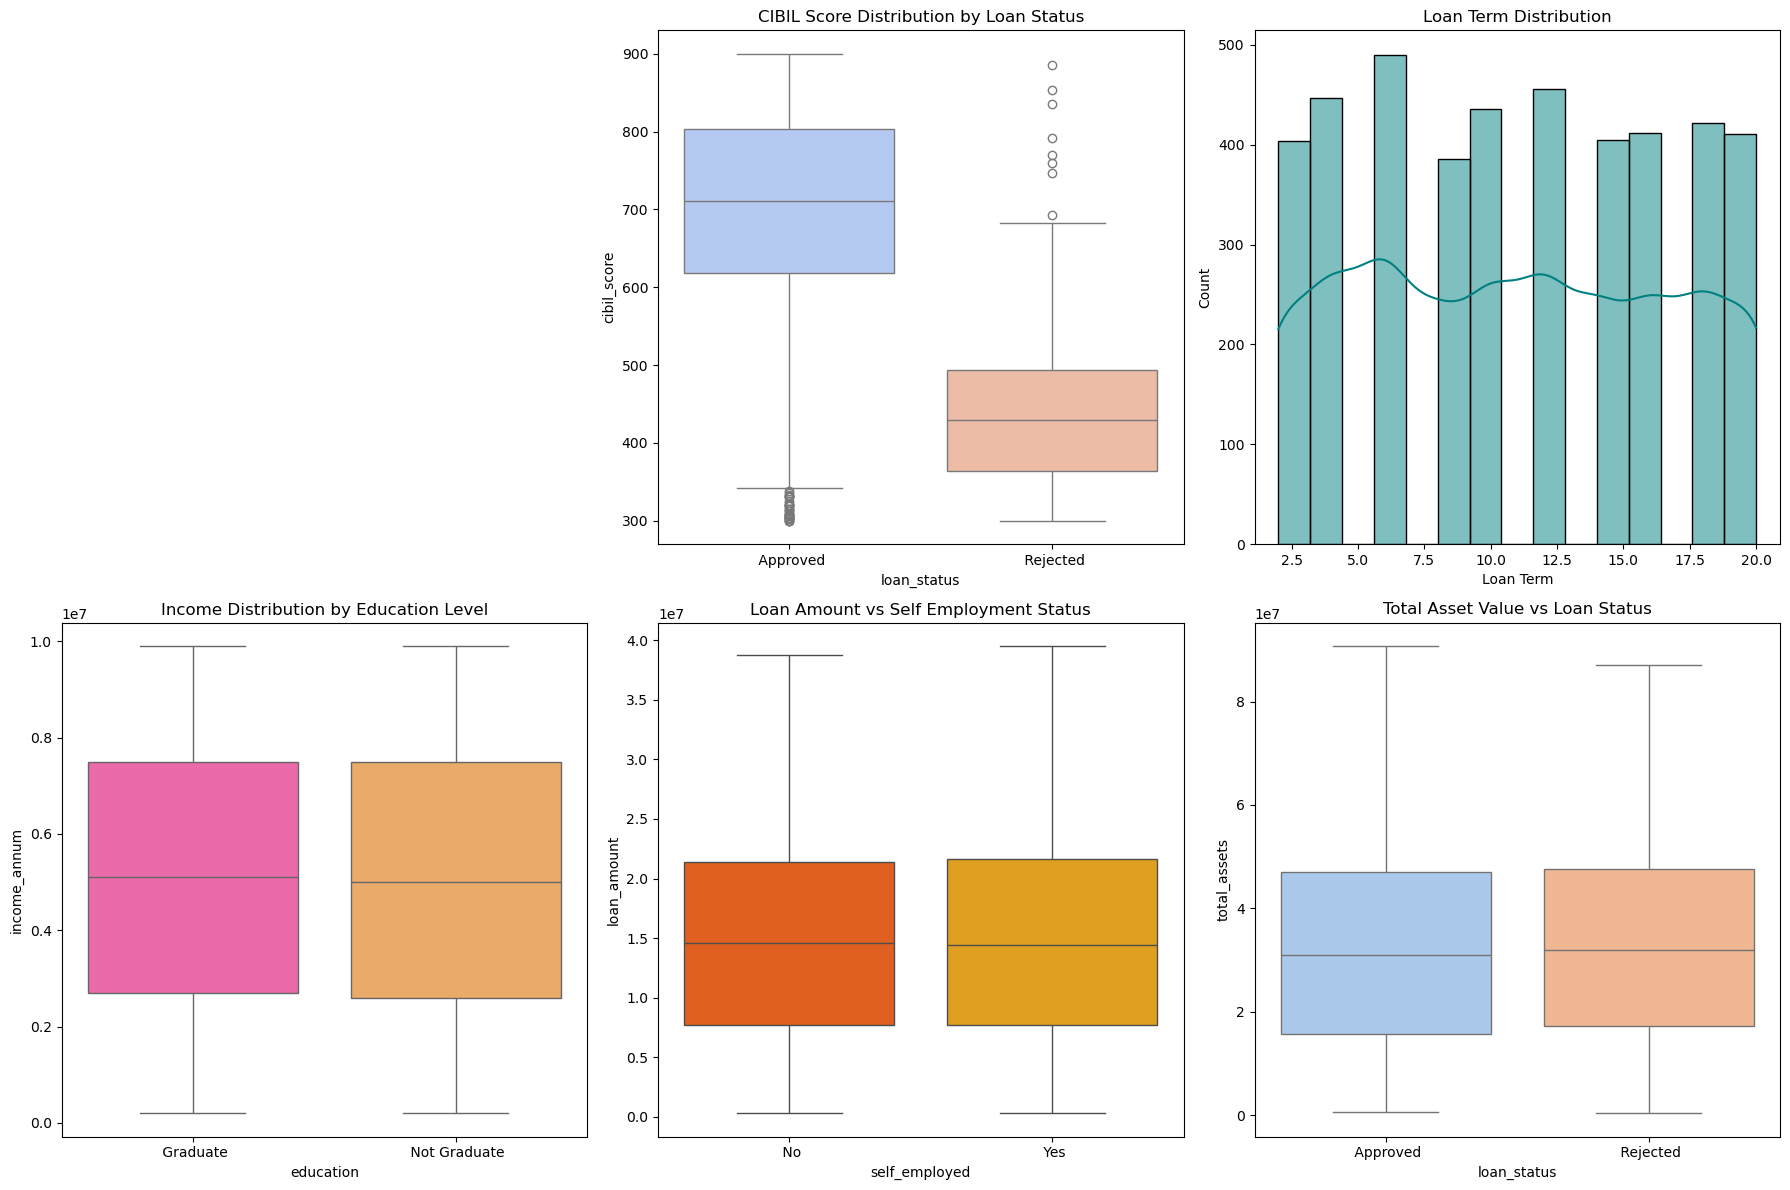

In [17]:
# Additional Visualizations for Loan Approval Dataset

plt.figure(figsize=(18, 12))



# 2. Boxplot: CIBIL Score vs Loan Status
plt.subplot(2, 3, 2)
sns.boxplot(data=df, x='loan_status', y='cibil_score', palette='coolwarm')
plt.title('CIBIL Score Distribution by Loan Status')

# 3. Loan Term Distribution
plt.subplot(2, 3, 3)
sns.histplot(data=df, x='loan_term', kde=True, bins=15, color='teal')
plt.title('Loan Term Distribution')
plt.xlabel('Loan Term')

# 4. Income Distribution by Education
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='education', y='income_annum', palette='spring')
plt.title('Income Distribution by Education Level')

# 5. Loan Amount by Self-Employed Status
plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='self_employed', y='loan_amount', palette='autumn')
plt.title('Loan Amount vs Self Employment Status')

# 6. Total Assets vs Loan Status (sum of asset columns)
df['total_assets'] = df[['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']].sum(axis=1)
plt.subplot(2, 3, 6)
sns.boxplot(data=df, x='loan_status', y='total_assets', palette='pastel')
plt.title('Total Asset Value vs Loan Status')

plt.tight_layout()
plt.show()


In [18]:
# Split data into features and target
X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.977751756440281

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       536
           1       0.98      0.96      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.98       854
weighted avg       0.98      0.98      0.98       854



In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [20]:
# Model 1: Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_log = log_model.predict(X_test)
print("🔹 Logistic Regression Accuracy:", accuracy_score(y_test, y_log))


🔹 Logistic Regression Accuracy: 0.8149882903981265


In [21]:
# Model 2: Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_svm = svm_model.predict(X_test)
print("🔹 SVM Accuracy:", accuracy_score(y_test, y_svm))

🔹 SVM Accuracy: 0.6276346604215457


In [22]:
# Model 3: K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_knn = knn_model.predict(X_test)
print("🔹 KNN Accuracy:", accuracy_score(y_test, y_knn))


🔹 KNN Accuracy: 0.5784543325526932


In [23]:
# Model 4: Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_gb = gb_model.predict(X_test)
print("🔹 Gradient Boosting Accuracy:", accuracy_score(y_test, y_gb))


🔹 Gradient Boosting Accuracy: 0.977751756440281


In [24]:
# Model 5: Voting Classifier (Ensemble of RF, Logistic, GradientBoost)
vote_model = VotingClassifier(estimators=[
    ('rf', model),
    ('log', log_model),
    ('gb', gb_model)
], voting='hard')
vote_model.fit(X_train, y_train)
y_vote = vote_model.predict(X_test)
print("🔹 Voting Classifier Accuracy:", accuracy_score(y_test, y_vote))


🔹 Voting Classifier Accuracy: 0.9754098360655737


Logistic Regression Accuracy: 0.81
SVM Accuracy: 0.63
KNN Accuracy: 0.58
Random Forest Accuracy: 0.98
Gradient Boosting Accuracy: 0.98
Voting Classifier Accuracy: 0.98


C:\Users\91733\AppData\Local\Temp\ipykernel_19180\253095183.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=acc_values, palette='pastel')


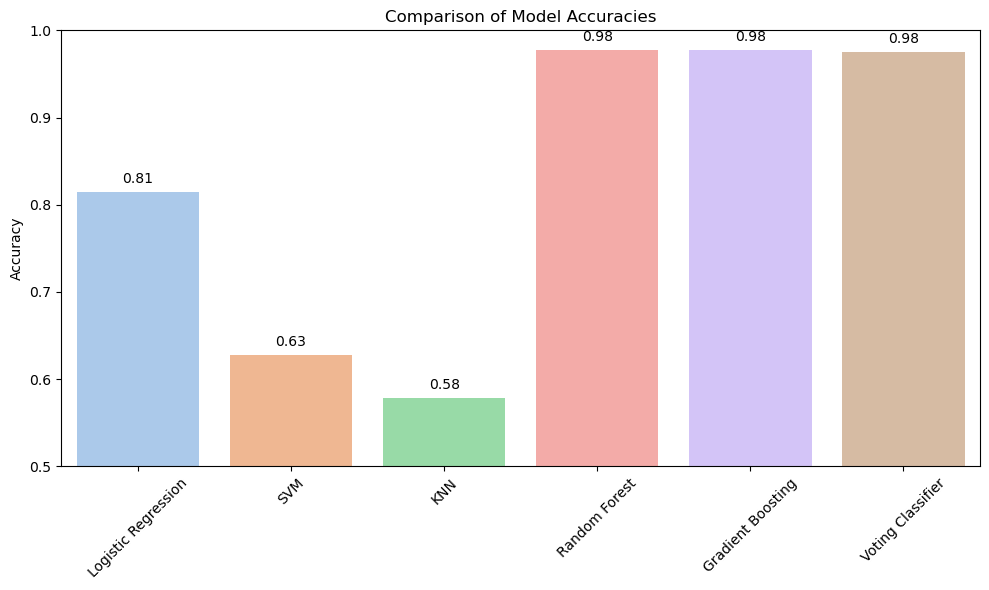

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Split data into features and target
X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

accuracies = {}

# Train each model and store accuracy
for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f"{name} Accuracy: {acc:.2f}")

# Add Voting Classifier
voting = VotingClassifier(estimators=[
    ('lr', models['Logistic Regression']),
    ('rf', models['Random Forest']),
    ('gb', models['Gradient Boosting'])
], voting='hard')

voting.fit(X_train, y_train)
y_vote = voting.predict(X_test)
vote_acc = accuracy_score(y_test, y_vote)
accuracies['Voting Classifier'] = vote_acc
print(f"Voting Classifier Accuracy: {vote_acc:.2f}")

# Plotting accuracies
plt.figure(figsize=(10,6))
model_names = list(accuracies.keys())
acc_values = list(accuracies.values())

sns.barplot(x=model_names, y=acc_values, palette='pastel')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1.0)
plt.title('Comparison of Model Accuracies')

# Add labels on bars
for i, acc in enumerate(acc_values):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=10)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
